Atalov S.

# Логистическая регрессия
## Logistic Regression
---

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("iris (2).csv")
df

Покажите уникальные значения целевой переменной

In [ ]:
df['Species'].unique()

Приведите их в числовой вид

In [ ]:
df.loc[df['Species'] == 'Iris-setosa','Species'] = 0
df.loc[df['Species'] == 'Iris-versicolor','Species'] = 1
df.loc[df['Species'] == 'Iris-virginica','Species'] = 2
df

Создайте новый датафрейм в котором будут только 'Iris-versicolor' и 'Iris-virginica'

In [ ]:
a = df[df['Species'] != 0]
a

In [ ]:
a.info()

X - Длина лепестка,
y - Тип цветка

In [ ]:
y = a['Species']
X = a['PetalLengthCm']

In [ ]:
X = np.array(X).reshape(-1,1)

Загружаем библиотеки

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


Построение модели

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X, y)

Прогноз на основе модели

In [ ]:
y_pred = lin_reg.predict(X)

In [ ]:
y_pred

In [ ]:
# первый тип цветка
plt.plot(df[df['Species']==1]['PetalLengthCm'], df[df['Species']==1]['PetalWidthCm'], 'bo', label = "Iris-versicolor");

# второй тип цветка
plt.plot(df[df['Species']==2]['PetalLengthCm'], df[df['Species']==2]['PetalWidthCm'], "r+", label = "Iris-virginica");
plt.plot(X,y_pred)

plt.show();

Такой же график но в другом виде
```
x = ['PetalLengthCm']
y = y
c = y
```

In [ ]:
plt.plot(X,y_pred);


График. Как модель линейной регрессии разделила точки на классы
```
x = ['PetalLengthCm']
y = ['PetalWidthCm']
c = y_pred
```

График1
```
x = ['PetalLengthCm']
y = y
c = y
```

График2
```
x = ['PetalLengthCm']
y = y_pred
c = y
```

In [ ]:
lin_reg.score(X, y)

Score

Попробовать сделать то же самое с помощью модели Логистической регрессии

Последний график показать для логистической регрессии

График. Как модель логистической регрессии разделила точки на классы
```
x = ['PetalLengthCm']
y = ['PetalWidthCm']
c = y_pred
```

Score

Прогнозирование

---
# Немного математики "под капотом"
## Сигмоидная функция

### Обычная модель линейной регрессии $h_θ(x)=θ^{T}x$

### Функция сигмоиды $g(z)= \frac{1}{1+e^{−z}}$

### Если как аргументом функции сигмоиды  дать модель регрессии $z=h_θ(x)=θ^{T}x$



### Получим:

## $g(z)= \frac{1}{1+e^{−(θ^{T}x)}}$

Попробуйте нарисовать график сигмоидной функции

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
z = a['Species']
g =  a['PetalLengthCm']


In [ ]:
np.reshape(g, -1)

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X, y)

In [ ]:
plt.scatter(X, y);
plt.axvline(0, color = 'b');
plt.xlabel('z')
plt.ylabel('g(z)')

In [ ]:
log_reg.score(X, y)

In [ ]:
y_pred = log_reg.predict(X)
y_pred

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2)

In [ ]:
X_test

In [ ]:
log_reg.fit(X_train, y_train)

In [ ]:
log_reg.score(X_train, y_train)

In [ ]:
log_reg.score(X_test, y_test)

In [ ]:
y_predict = log_reg.predict(5.1)
y_predict

In [ ]:
c = a[a['Species'] == 1]
c['PetalLengthCm'].max()

# Логистическая функция в sklearn на примере прогнозирования оттока абонентов

In [1]:
import pandas as pd

In [7]:
df = pd.read_excel("telecom_churn (3).xlsx")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
from sklearn.model_selection import train_test_split

In [ ]:
df.info()

In [13]:
df.loc[df['Churn'] == False,'Churn'] = 0
df.loc[df['Churn'] == True, 'Churn'] = 1
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [14]:
X = df2[[ 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Customer service calls']]
y = df2['Churn']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
log_reg = LogisticRegression()

In [18]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
log_reg.score(X_train, y_train)

0.8555888972243061

In [20]:
log_reg.score(X_test, y_test)

0.8605697151424287

In [22]:
import matplotlib.pyplot as plt

Text(0,0.5,'g(z)')

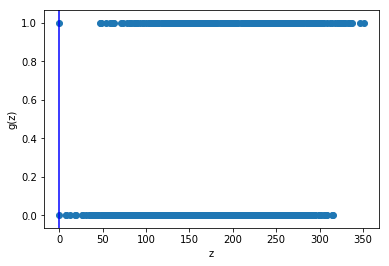

In [29]:
plt.scatter(X_train['Total day minutes'], y_train);
plt.axvline(0, color = 'b');
plt.xlabel('z')
plt.ylabel('g(z)')

In [31]:
y_pred = log_reg.predict(X_test)

In [34]:
log_reg.score(X_test, y_pred)

1.0